In [119]:
import pandas as pd
import numpy as np
import json
import datetime 

In [120]:
login = pd.read_json('C:/Users/jeffr/Downloads/1481053515_ultimate_challenge/ultimate_challenge/logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [121]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [122]:
login.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


# Part 1: Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [129]:
login.index = pd.to_datetime(login.login_time, unit='m')
freq = login.groupby(pd.Grouper(freq='15Min')).agg(['count']).rename(columns=dict(count='counts'))
freq.columns = freq.columns.droplevel(0)
freq = freq.reset_index(drop=False)

In [124]:
freq.head()

,login_time,counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [125]:
freq.tail()

,login_time,counts
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7
9787,1970-04-13 18:45:00,6


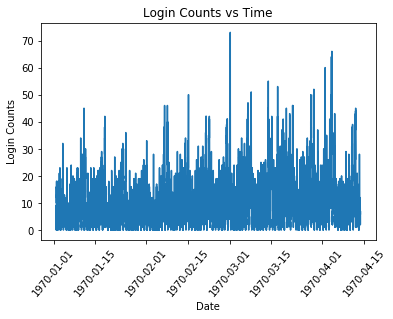

In [126]:
freq = freq.reset_index()
x = freq['login_time']
y = freq['counts']
plt.plot(x, y)
plt.title('Login Counts vs Time')
plt.xticks(rotation = 50)
plt.xlabel("Date")
plt.ylabel("Login Counts")
plt.show()

It appears there is a cyclical nature to the data. The peaks seem to increase over time, with the first week having a peak at a little over 30 counts, and the last weeks having peaks over 40 counts. Let us look closer at one month now.

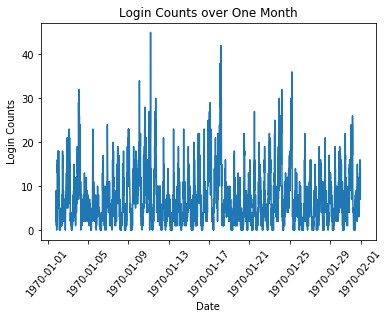

In [127]:
freq = freq.reset_index()

subset = freq[freq['login_time']<"1970-02-01"]
x = subset['login_time']
y= subset['counts']
plt.plot(x, y)
plt.title('Login Counts over One Month')
plt.xticks(rotation = 50)
plt.xlabel("Date")
plt.ylabel("Login Counts")
plt.show()

There appears to be a cyclical weekly peak. Let us examine one day in more detail.

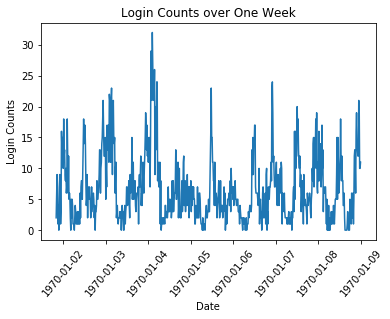

In [130]:
freq = freq.reset_index()

subset = freq[freq['login_time']<"1970-01-09"]
x = subset['login_time']
y= subset['counts']
plt.plot(x, y)
plt.title('Login Counts over One Week')
plt.xticks(rotation = 50)
plt.xlabel("Date")
plt.ylabel("Login Counts")
plt.show()

There appears to be a peak for each day, let us examine one day.

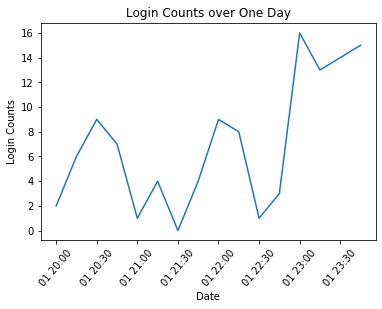

In [131]:
freq = freq.reset_index()

subset = freq[freq['login_time']<"1970-01-02"]
x = subset['login_time']
y= subset['counts']
plt.plot(x, y)
plt.title('Login Counts over One Day')
plt.xticks(rotation = 50)
plt.xlabel("Date")
plt.ylabel("Login Counts")
plt.show()

It appears the peak in a day occurs in the evening, let us backtrack and check peaks over the week while marking the evenings.

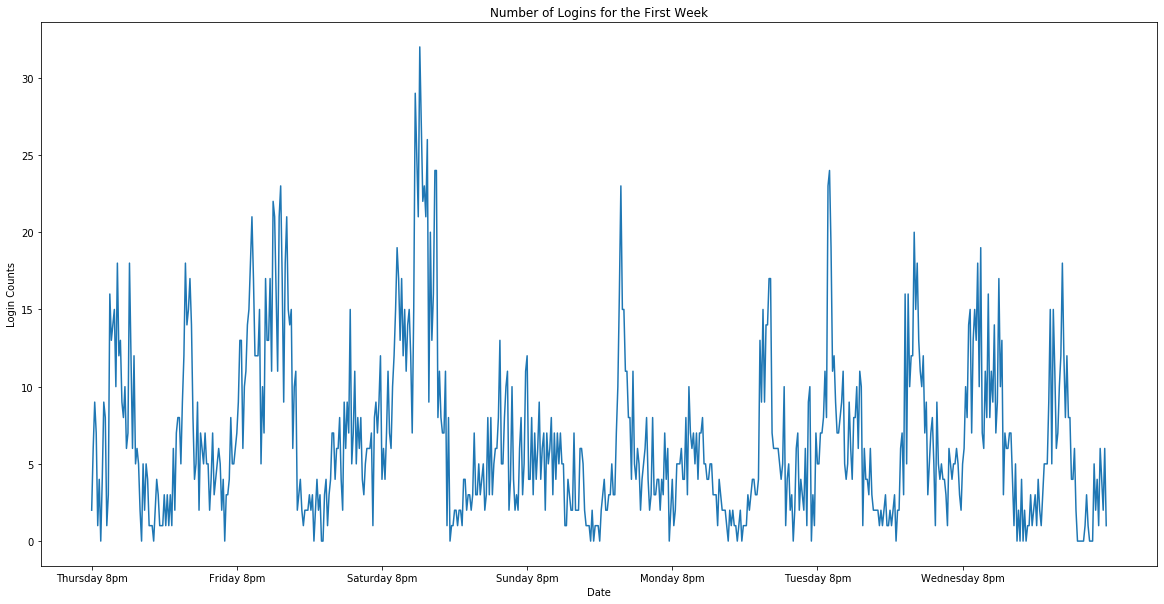

In [132]:
plt.figure(figsize=(20,10))
plt.plot(counts[0:672]) #4 timesteps per hour times 24 hours per day gives 672 steps
plt.title("Number of Logins for the First Week")
plt.xlabel("Date")
plt.ylabel("Login Counts")
plt.xticks([x for x in range(0,len(counts[0:672]),96)],
           ("Thursday 8pm","Friday 8pm", "Saturday 8pm", "Sunday 8pm", "Monday 8pm", "Tuesday 8pm", "Wednesday 8pm"))
plt.show()

When considering time of day, it appears there are daily peaks in the evening. 

In summary, it appears that the weekly peaks are increasing slowly over time as well as having daily peaks in the evenings. 

# Part 2: Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

## What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The goal of the experiment seems to be to increase the number of drivers who service both cities. To do this, the Ultimate managers are willing to reimburse all toll costs. To check to see if their experiment is successful, we need to evaluate how many drivers service both cities. Since both Gotham and Metropolis are on complementary circadian rhythms, it is unfeasible for one person to work in both cities at peak times during the week days due to sleep constraints. Thus the key measure of success in this experiment is the change in engagement of drivers in the opposite city of their  residence on the weekends when activity is relatively equal between both cities. 

# Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

# a. how you will implement the experiment
# b. what statistical test(s) you will conduct to verify the significance of the observation
# c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

A: A baseline for all driver habits on the weekends in the two cities needs to be recorded first. Then the drivers are notified of the toll reimbursement program, and their driving habits on the weekends are tracked again. One would expect an increase in the amount of inter-city travel from the drivers.

B: A paired sample t-test will be run to evaluate the change in driver habits on the weekends as a result of the toll reimbursement program. A paired sample t-test is most applicable in this situation because we are measuring the change in behavior for each driver. 

C: The null hypothesis is that there is no change in driver habits as a result of the toll reimbursement program. After running the paired sample t-test, we will use the p-value to reject or fail to reject the null hypothesis at the 95% confidence level. After we have the p-value, we can make recommendations on whether or not a Toll Reimbursement program increases driver partner service to both cities or not. A caveat is that although service between both cities will most likely be increased, profits might not necessarily increase due to the tolls being paid by the Ultimate managers. Thus an additional cost analysis must be done to evaluate if profits increased or not due to this toll reimbursement program as well to see if it is feasible. 

# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).


In [133]:
#read and load
with open('C:/Users/jeffr/Downloads/1481053515_ultimate_challenge/ultimate_challenge/ultimate_data_challenge.json') as f:
    data = json.load(f) 
#convert to dataframe
usage = pd.DataFrame(data)

In [134]:
usage.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [135]:
#convertto datetime
usage['last_trip_date'] = pd.to_datetime(usage['last_trip_date'])
usage['signup_date']    = pd.to_datetime(usage['signup_date'])

#calculate active number of days
usage['num_of_days_active'] = usage['last_trip_date'] - usage['signup_date'] 

#boolean for activity
usage['active_user'] = usage['num_of_days_active'].apply(lambda x: int(x >= pd.Timedelta('150 days')))

#boolean for iphone
usage['phone'] = usage['phone'].apply(lambda x: int(x == 'iPhone'))

#boolean for ultimate black user
usage['ultimate_black_user'] = usage['ultimate_black_user'].apply(lambda x: int(x == True))

#drop NaN 
usage=usage.dropna(0)

In [136]:
usage.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,num_of_days_active,active_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,1,2014-01-25,15.4,4,1,46.2,143 days,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,0,2014-01-29,0.0,0,0,50.0,96 days,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,1,2014-01-06,0.0,3,0,100.0,1 days,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,1,2014-01-10,20.0,9,1,80.0,170 days,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,0,2014-01-27,11.8,14,0,82.4,47 days,0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,1,2014-01-09,0.0,2,1,100.0,148 days,0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,1,2014-01-28,0.0,2,0,100.0,1 days,0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,0,2014-01-21,0.0,2,0,100.0,11 days,0
10,4.28,4.9,5.0,1.00,Winterfell,2014-05-30,1,2014-01-13,0.0,1,1,100.0,137 days,0
11,3.81,5.0,4.0,1.00,Winterfell,2014-01-10,1,2014-01-06,0.0,3,0,100.0,4 days,0


In [137]:
# Getting the proportion of users retained.
retained_counts = dict(usage.active_user.value_counts())
print("%.2f%% of Users Retained" % (retained_counts[True]*100/len(usage.index)))

28.25% of Users Retained


Answer to 1: Converted the dates to datetime. Changed some categorical variables like phone and ultimate_black_user to booleans to make it easier to build a predictive model with. Also created an active_user feature to help calculate what fraction of the observed users were retained. In this case, 28.25% of users were retained.

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 

# X, y
X = usage[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 
'phone', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']]
y = (usage.active_user == 1)

# Split training and test set.
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 33)

random_forest = RandomForestRegressor()
# Fit model on trainng data.
random_forest.fit(X_train, y_train)
# score from test data
print("Score:", random_forest.score(X_test,y_test))

# importance of each feature
random_forest.fit(Xlr / np.std(Xlr, 0), ylr)
print("Regression coefficients: ", clf.coef_)
print("Features: ", (X.columns.values))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score: 0.09044421447976558
Regression coefficients:  [[-0.19450894 -0.04693966 -0.0076392  -0.09664886  0.44146047  0.12888429
   0.35884681  0.33488806  0.00937524]]
Features:  ['avg_dist' 'avg_rating_by_driver' 'avg_rating_of_driver' 'avg_surge'
 'phone' 'surge_pct' 'trips_in_first_30_days' 'ultimate_black_user'
 'weekday_pct']


Answer to 2: A Random Forest Regressor machine learning algorithm was applied due to the classification nature of the problem. Score was calculated to evaluate the mean accuracy of the given test data and labels. This model does not appear to have any key indicators. Other models that could have been used are Logistic Regression and Gradient Boost. My model does not seem to be very effective at predicting the correct label. Let us try another model.

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Xlr, Xtestlr, ylr, ytestlr = train_test_split(X.values, y.values, test_size=0.3, random_state=33)

lr = LogisticRegression()

lr.fit(Xlr, ylr)
print("Accuracy score: ", accuracy_score(lr.predict(Xtestlr), ytestlr))

lr.fit(Xlr / np.std(Xlr, 0), ylr)
print("Regression coefficients: ", lr.coef_)
print("Features: ", (X.columns.values))

Accuracy score: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 0.7304375598850208
Regression coefficients:  [[-0.19450894 -0.04693966 -0.0076392  -0.09664886  0.44146047  0.12888429
   0.35884681  0.33488806  0.00937524]]
Features:  ['avg_dist' 'avg_rating_by_driver' 'avg_rating_of_driver' 'avg_surge'
 'phone' 'surge_pct' 'trips_in_first_30_days' 'ultimate_black_user'
 'weekday_pct']


Continued answer to 2: The logistic regression model was approximately 73% accurate at making the correct prediction. Seems better than the Random Forest model that was built. Key indicators appear to be phone, trips in first 30 days, and ultimate black user based off of regression coefficients. 

Answer to 3:

Based off the model, I would make these three recommendations.
    
1. Ultimate should advertise on the apple store, becuase from the model, iPhone users tend to be more active than Android
2. Ultimate should provide incentives to get people to take trips in the first 30 days as those that took trips in the first 30 days tended to be retained by the company
3. Ultimate should make it more attractive to users to use the ultimate black service, as it seems those that did tended to be retained more as well. Perhaps giving discounts on the service would increase profits overall.